In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import oauth2 as oauth
import twitter
import tweepy
import time

import nltk
import re
import string
from collections import Counter
from wordcloud import WordCloud
from textblob_de import TextBlobDE
from sklearn.feature_extraction.text import CountVectorizer
from gensim import matutils, models
import scipy.sparse
import math

nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sched\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sched\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<b>Analysing the twitter feed of Norbert Bolz via NLP methods</b>

Norbert Bolz is a retired German professor for Media and Communication science. In recent years he has recieved a lot of public attention in the German mainstream media mainly through his publications on social and philosophical topics and his position as a right conservative intellectual. Given the importance of Bolz's tweets for his general public reception I will be scraping Bolz's 4000 most recent tweets and run some different NLP analysis on them in order to identify certain key topics and other references, which are frequently made in said tweets.

<b>Scraping & Cleaning the data</b>

In [2]:
api_key = "X"
api_secret = "X"
access_token_key = "X"
access_token_secret = "X"

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token_key, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [14]:
tweets = []

def username_tweets_to_csv(username,count):
    try:      
        tweets = tweepy.Cursor(api.user_timeline,id=username).items(count)

        tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]

        tweets_df = pd.DataFrame(tweets_list,columns=['Datetime', 'Tweet Id', 'Text'])

        tweets_df.to_csv('{}-tweets.csv'.format(username), sep=',', index = False)

    except BaseException as e:
          print('failed on_status,',str(e))
          time.sleep(3)

In [17]:
username_tweets_to_csv("@NorbertBolz", 4000)

In [4]:
tweets_bolz = pd.read_csv("../Twitter-Analysis (NLP)/@NorbertBolz-tweets.csv", sep =',')

In [5]:
stoplist_ger = nltk.corpus.stopwords.words('german')
stoplist_append = ['rt', 'heute', 'wer', 'gibt', 'mehr', 'the', '“', 'immer']
stoplist_ger = stoplist_ger+stoplist_append

In [6]:
def clean_text(text):
    text = text.lower()
    text = re.sub('https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,}', "", text)
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    text = re.sub('\\n', '', text)
    text = re.sub('[0-9]*', '', text)
    return text

clean = lambda x: clean_text(x)

tweets_clean = pd.DataFrame(tweets_bolz.Text.apply(clean_text))

In [7]:
tweets_clean

,Text
0,man kann freiheit nicht ohne den begriff der i...
1,wo ist marcel reif
2,rt darthputinkgb going through immigration in ...
3,das ist zwar logisch falsch aber politisch ric...
4,das grüne versprechen dass alles möglich ist w...
...,...
3240,moralfanatismus ist die bußfertigkeit der gott...
3241,gutmenschentum ist moralische selbstbefriedigu...
3242,typisch deutsch ist die frage was ist deutsch
3243,uns fehlt heute die kraft zuschauer zu bleiben


In [9]:
cv = CountVectorizer(stop_words = stoplist_ger)
tweets_cv = cv.fit_transform(tweets_clean.Text)
tweets_clean2 = pd.DataFrame(tweets_cv.toarray(), columns=cv.get_feature_names())
tweets_clean2.index = tweets_clean.index
tweets_clean2

,ab,abaerbock,abbestellt,abbé,abendland,abendlandes,abendländische,abendländischer,abenteuer,abfallen,...,از,دست,دیدن,ذره,سطحشون,فرق,مومن,میکنه,کافر,یه
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<b>Word Cloud</b>

In [10]:
string_tweets = tweets_clean.to_string(header=False, index=False, index_names=False)

In [11]:
string_token = nltk.word_tokenize(string_tweets)
string_token = [w for w in string_token if not w.lower() in stoplist_ger]

In [12]:
c = Counter(string_token)
c.most_common(30)

[('maternus', 85),
 ('politik', 78),
 ('welt', 73),
 ('gut', 72),
 ('politische', 71),
 ('menschen', 69),
 ('freiheit', 62),
 ('deutschen', 59),
 ('grünen', 57),
 ('schon', 56),
 ('politischen', 56),
 ('gesellschaft', 56),
 ('merkel', 56),
 ('deutschland', 54),
 ('wäre', 51),
 ('frau', 49),
 ('linken', 48),
 ('problem', 44),
 ('spd', 43),
 ('macht', 42),
 ('leben', 41),
 ('deutsche', 40),
 ('politisch', 39),
 ('angst', 39),
 ('medien', 39),
 ('einfach', 39),
 ('rechts', 38),
 ('linke', 37),
 ('aufklärung', 36),
 ('wahrheit', 36)]

In [13]:
words = ' '.join(string_token)
wordcloud = WordCloud(width=1600, height=400).generate(words)

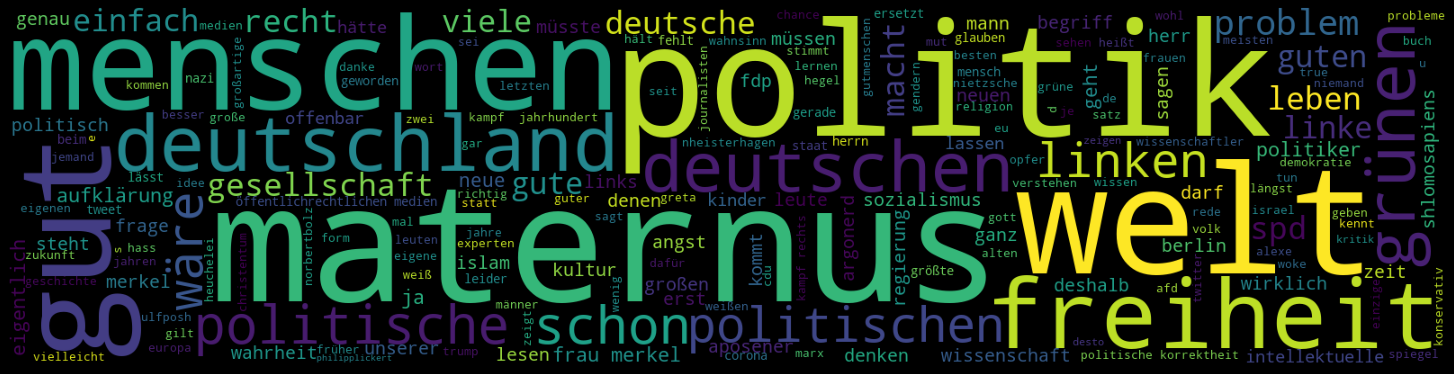

In [14]:
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<b>Unique words</b>

In [15]:
unique = [w for w in string_token if c[w] == 1]
len(unique)

6421

<b>Sentiment analysis</b>

In [15]:
pol = lambda x: TextBlobDE(x).sentiment.polarity
sub = lambda x: TextBlobDE(x).sentiment.subjectivity

tweets_clean['polarity'] = tweets_clean['Text'].apply(pol)
tweets_clean['subjectivity'] = tweets_clean['Text'].apply(sub)

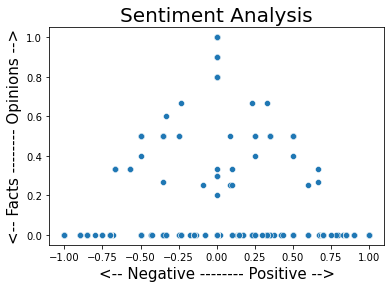

In [17]:
sb.scatterplot(data=tweets_clean, x="polarity", y="subjectivity")
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)
plt.show()

<b>Sentiment over time</b> <br>
A frequent argument, which is often brought up in the current media discourse revolving around Norbert Bolz, is the assumption that Bolz's tweets have gotten more radical and poignant over the years. Thus, I also want to analyse the development of sentiment over time in Bolz's tweets and see if there can be observed any notable change throughout his twitter activity.

In [38]:
def split_text(text, n=20):
    
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [39]:
string_tweets_split = split_text(string_tweets, n=20)

In [46]:
polarity_tweets = []
for lp in string_tweets_split:
    polarity_tweets.append(TextBlobDE(lp).sentiment.polarity)

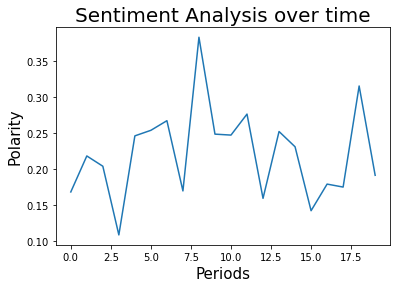

In [45]:
sb.lineplot(data = polarity_tweets)
plt.title('Sentiment Analysis over time', fontsize=20)
plt.xlabel('Periods', fontsize=15)
plt.ylabel('Polarity', fontsize=15)
plt.show()

As you can see from the lineplot the assumption that Bolz's tweets have become more radical (i. e. polarising) can - at least in the case of this sentiment analysis over time - not be confirmed. Instead the plot shows a constant alternation between periods of higher polarity followed by periods of lower polarity.

<b>Topic modeling</b>

In [21]:
sparse_counts = scipy.sparse.csr_matrix(tweets_clean2)
corpus = matutils.Sparse2Corpus(sparse_counts)
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, passes=30)
lda.print_topics()

[(0,
  '0.004*"augenmaß" + 0.004*"erste" + 0.004*"essen" + 0.004*"erzieher" + 0.003*"erfreun" + 0.003*"einführen" + 0.003*"affektkontrolle" + 0.003*"erfolgreichen" + 0.003*"empfinden" + 0.003*"bewunderte"'),
 (1,
  '0.003*"erster" + 0.003*"abtut" + 0.003*"erreichen" + 0.002*"abschiebung" + 0.002*"fast" + 0.002*"euinstitution" + 0.002*"beherrschenden" + 0.002*"antikapitalistische" + 0.002*"genügt" + 0.002*"antikapitalismus"'),
 (2,
  '0.003*"drängen" + 0.003*"deren" + 0.002*"course" + 0.002*"eingewönt" + 0.002*"erbsünde" + 0.002*"ausnahme" + 0.002*"erwachte" + 0.002*"achilles" + 0.002*"angriff" + 0.002*"christen"'),
 (3,
  '0.006*"demokratische" + 0.004*"abgrund" + 0.003*"gottesdienst" + 0.003*"flohmarkt" + 0.003*"gesellschaftlichen" + 0.003*"excuse" + 0.002*"erschreckend" + 0.002*"gelöst" + 0.002*"dante" + 0.002*"demontiert"'),
 (4,
  '0.003*"eurokraten" + 0.003*"bürgermeister" + 0.002*"erschossen" + 0.002*"durchbrechen" + 0.002*"gender" + 0.002*"gewinnt" + 0.002*"gelingt" + 0.002*"eli

The topic analysis shows that themes such as criticising and mocking the leftist elite make a frequent occurence in Bolz's tweets. Furthermore these critiques on Bolz's "political enemies" are often accompanied by references to political discourses of the present Zeitgeist such as the Covid pandemic, gender differences and other topics regarding the struggle for equality. Another notable topic frequently occuring in the tweets is constituted by references to christianity and religious belief in general, which is not much of a surprise, when you consider Bolz's conservative background.

<b>Distribution of specific words</b>

In [22]:
expression = 'grüne'
pos = 0 
positions = []

while pos != -1:
    position = string_tweets.find(expression,pos+1)
    pos = position
    positions.append(position)
positions.pop()
print('The expression is found {} times'.format(len(positions)))
print(positions)

The expression is found 89 times
[633, 2055, 5751, 10494, 15923, 16922, 18682, 23552, 28651, 44990, 53911, 56241, 63336, 63485, 63817, 66479, 90382, 90773, 97279, 97782, 104899, 114787, 126532, 132475, 141747, 149562, 149768, 154682, 155533, 168389, 174338, 174504, 177091, 177475, 178340, 180570, 188612, 189668, 193047, 215583, 225460, 225475, 236504, 243254, 257821, 271955, 296417, 297901, 304409, 304902, 307153, 307525, 307853, 310337, 311885, 317180, 327116, 335774, 337499, 339582, 346895, 354411, 358721, 365004, 367059, 367895, 368127, 368268, 369553, 375256, 379161, 386219, 386330, 388793, 389429, 389978, 393153, 395111, 395312, 398327, 401126, 403649, 411401, 414874, 418489, 419431, 435153, 435710, 451151]


In [23]:
window = 30
for position in positions[0:20]:
    print(string_tweets[position - window:position + window + len(expression)].strip())

das grüne versprechen dass alles möglic
sage als werbesendung für die grünen  eine interessante initiativ
erschaft des guten
       die grünen zeigen wie erfolgreich eine
ner  jakobiner  bolschewiken  grüne
                          die
t dass sie propaganda für die grünen betreiben und den judenhass…
es wird lustig mit der grünen kanzlerin
die grünen puritaner kennen nur eine fr
rote und grüne haben sich ja längst gefunden
taat bekommen gerade weil die grünen unser bestes wollen aber nic
die grünen sind entweder wassermelonen
er  vereinigt euch
           grüne und linke können abgründe der
der grüne zeitgeist säkularer puritanis
rd sich über das programm der grünen am meisten freuen  deutliche
kein wähler der grünen wird ihr programm lesen  und
listen finden im programm der grünen “interessantes“
ich zu sein dass man sich die grünen leisten kann
die grüne priesterherrschaft wasser pre
die grünen sind durch und durch unpolit
grüner tugendterror
es gäbe keine grünen mehr wenn man sie z

In [68]:
string_token2 = nltk.Text(string_token)
string_token2.concordance(expression.lower(), width=120, lines=20)

Displaying 15 of 15 matches:
occupationme no just h… logisch falsch politisch richtig grüne versprechen möglich berlin eingelöst goethe dumme sätze 
pen heiligen aktivismus puritaner jakobiner bolschewiken grüne linken extrem antimarxistisch setzen lumpenproletariat m
uelle früher daran gearbeitet stämmen nationen for… rote grüne ja längst gefunden konservativen liberalen begriffen… st
 neue kommunistische manifest fanatiker länder vereinigt grüne linke abgründe inkompetenz offenbaren wähler nachdenken 
 tabuisiert bestimmte gedanken falsch unakzeptabel denkt grüne zeitgeist säkularer puritanismus trade off freiheit glei
esse intelligenter… schlimmer rodeln aposener lauterbach grüne priesterherrschaft wasser predigen wein trinken politisc
lt herrn edenhofer wissen steht avantgarde angst kapitel grüne papst what laschet herr merkel endgültige kommentar them
licher bevormundung vermittelt große koalition folge fdp grüne linke oppositionsparteien gelähmt gedanke… lieber herr p
achhaltigke

In [25]:
expression = 'klima'
pos = 0 
positions = []

while pos != -1:
    position = string_tweets.find(expression,pos+1)
    pos = position
    positions.append(position)
positions.pop()
print('The expression is found {} times'.format(len(positions)))
print(positions)

The expression is found 43 times
[21487, 22225, 35899, 62148, 67653, 75208, 83568, 104472, 125872, 145388, 146056, 186852, 216503, 303436, 304534, 310210, 332208, 346191, 346601, 348098, 349080, 350130, 353043, 353657, 354504, 364088, 364517, 364814, 369103, 369570, 375735, 381031, 381723, 382955, 383782, 384069, 388817, 393627, 399912, 413628, 414318, 444300, 451250]


In [26]:
window = 30
for position in positions[0:20]:
    print(string_tweets[position - window:position + window + len(expression)].strip())

ner wenn es kälter ist als es klimawandelwissenschaftlich erlaubt
rt maternus klimalockdown ick hör dir trapsen
das problem des klimawandels kann man wenn überhaup
n den leuten klar machen dass klimawand…
vor der klimakatastrophe warnen gegen recht
t
                        was klimaaktivisten coronahysteriker un
eligiösen enthusiasmus  heute klimawandel
corona klima und massenmigration werden un
er weltgeschichte
    wie der klimawandel inspiriert auch corona
er wir stecken hat nichts mit klima und corona zu tun sondern mit
nach dem klimaleugnern und coronaleugnern ne
wer kinder für klimaschädlich hält muss sehr schwe
m warnenden artikel über ein »klima der einschüchterung« an deuts
eife schulschwänzer gegen das klima demonstrieren jubelt die pres
genau wie der klimawandel wird auch die coronakri
s kracht 🙄 covid umweltschutz klimaschutz nannystaatschutz
gst begonnen terror migration klima virus
rkrieg das überhitzte meinungsklima die radikalisierunge…
tion von diversity gender und kl

In [71]:
string_token2.concordance(expression.lower(), width=120, lines=20)

Displaying 6 of 6 matches:
seidl gehören argonerd deutsche reiter apokalypse corona klima massenmigration politischmedialen elite probleme präsent
richtig stellen wohl fdp wählen politische krise stecken klima corona tun totalen ohnmacht parlaments politiker schlimm
n😡 zugeben schlecht argonerd stunden warnenden artikel » klima einschüchterung « deutschen schulen schnell haltungsjour
nheimer erst duden lenin pietbull unreife schulschwänzer klima demonstrieren jubelt presse wehe erwachsene steuerzahlen
hnt fall mauer zeitalter angst begonnen terror migration klima virus gesellschaftliche leben still steht zeit großen al
t welt freund feind carl schmitt hände reiben politische klima deutschland gutes symbol geßlerhut politischen diskussio
